Question 1

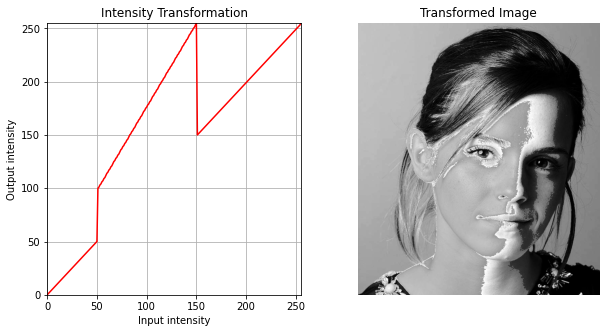

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,1]+1-0).astype('uint8')
t2 = np.linspace(c[0,0],255,c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0],255,255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

im_org = cv.imread("C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)
im_transf = cv.LUT(im_org, transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the lookup table
ax[0].plot(transform, 'r', label='Identity')
ax[0].set_title('Intensity Transformation')
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')

#Plot transformed Image
ax[1].imshow(im_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

plt.show()

Question 2

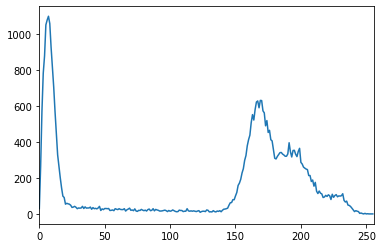

In [3]:
img = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
hist=cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


(0.0, 255.0)

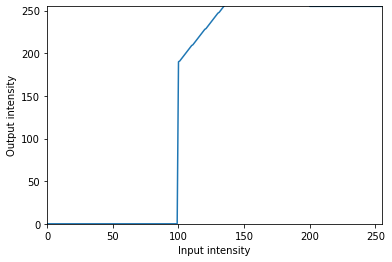

In [4]:
img_org = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

pixels = np.arange(0,256)
pixels[0:100] = 0
pixels[100:200] = 1.9*pixels[100:200]
pixels[200:256] = 255

def intensity_trans(img):
    img_transf = np.zeros_like(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_transf[i,j] = pixels[img[i,j]]
    return img_transf

img_transf = intensity_trans(img_org)

fig, ax = plt.subplots()
ax.plot(pixels)
ax.set_xlabel("Input intensity")
ax.set_ylabel("Output intensity")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)

Text(0.5, 1.0, 'Transformed Image')

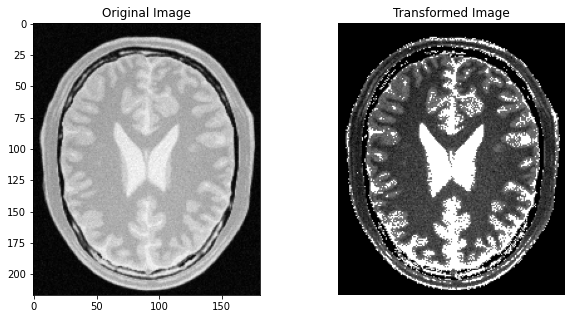

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#Plot original Image
ax[0].imshow(img_org, cmap='gray')
ax[0].set_title('Original Image')

#Plot transformed Image
ax[1].imshow(img_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

Text(0.5, 1.0, 'Transformed Image')

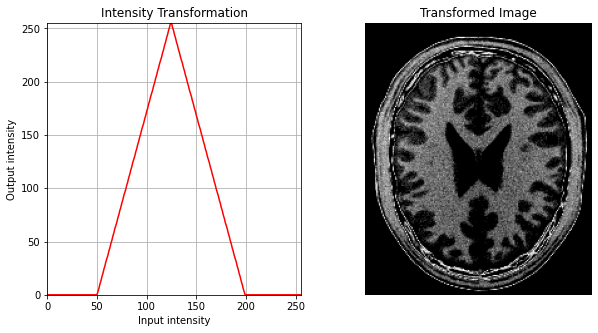

In [22]:
c = np.array([(125,50),(75,200)])

t1 = np.linspace(0,0,c[0,1]).astype('uint8')
t2 = np.linspace(0,255,c[1,0]).astype('uint8')
t3 = np.linspace(255,0,c[1,0]).astype('uint8')
t4 = np.linspace(0,0,c[0,1]+6).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the lookup table
ax[0].plot(transform, 'r', label='Identity')
ax[0].set_title('Intensity Transformation')
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')


im_transf = cv.LUT(img_org, transform)

#Plot transformed Image
ax[1].imshow(im_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

Question 3

In [32]:
img_org = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

img_lab = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
img_lab_planes = cv.split(img_lab)#
img_l = img_lab_planes[0]

#Adjust Gamma Values
gamma = 2.0
#Gamma Correction
img_l_gamma = np.power((img_l/255),1/gamma)*255

#updating L channel with gamma-corrected values
img_lab_gamcor = cv.merge((img_l_gamma.astype('uint8'), img_lab_planes[1].astype('uint8'), img_lab_planes[2].astype('uint8')))
img_gamma = cv.cvtColor(img_lab_gamcor, cv.COLOR_LAB2BGR)


